# Анализ сета данных о качестве красного вина.

Импортируем необходимые библиоткеки и датасет.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
wine = pd.read_csv("wine.csv")

In [3]:
wine.shape

(1599, 12)

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Смотрим, что из себя представляет датасет. 

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Узнаем тип информации сожержащейся в таблице, ее полноту. Можно отметить, что достаточную информацию имеют все колонки.

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Т.к. все колонки имеют числовой тип, можем сразу узнать многие статистические характеристики, такие как среднее значение, минимум и максимум.

Text(0.5, 0.98, 'График 1. Количество данных в зависимости от качества вина.')

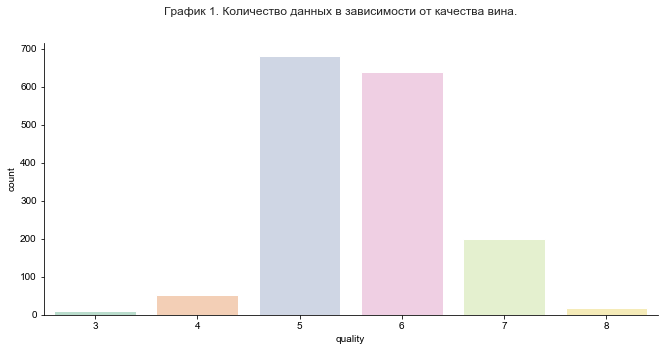

In [7]:
fig, ax = plt.subplots(figsize=(11, 5))
sns.set_style('white')
sns.set_palette('Pastel2')
sns.despine(right=True)
sns.countplot(x="quality", data=wine)
fig.suptitle('График 1. Количество данных в зависимости от качества вина.')

Как мы видем из графика, количество данных о вине качества меньше 4 или больше 7 недостаточно для выводов. Целесообразно удалить эта данные из анализа.

In [8]:
wine=wine[wine.quality>3]
wine=wine[wine.quality<8]

Text(0.5, 0.98, 'График 2. Степень корреляции всех величин.')

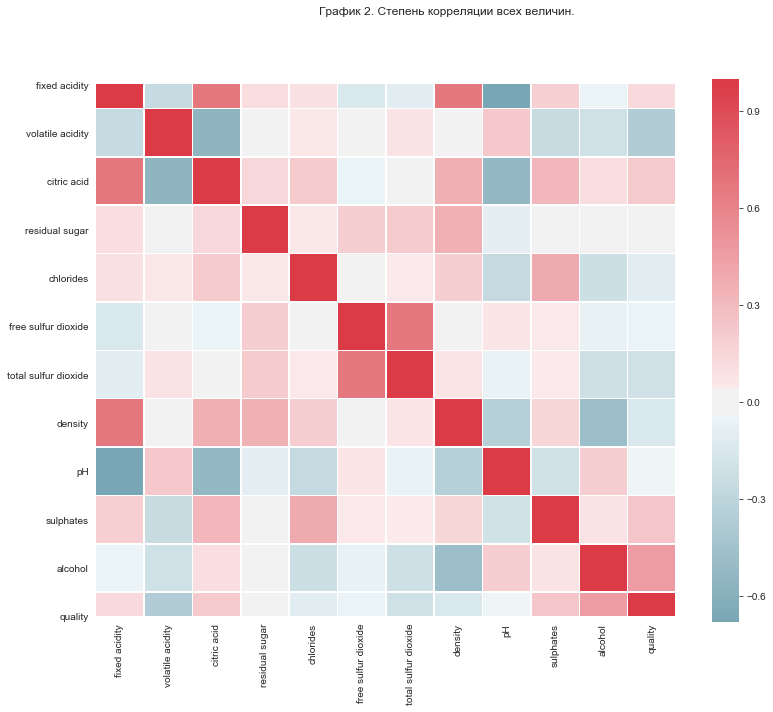

In [9]:
fig, ax = plt.subplots(figsize=(13, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(wine.corr(),  cmap=cmap, vmax=1, center=0, square=True, linewidths=.5)
fig.suptitle('График 2. Степень корреляции всех величин.')

Построим графики зависимость качества ('quality') от величин с самой большей корреляцией ('alcohol', 'sulphates', 'citric acid', 'volatile acidity') для последующего использования в построение классификатора. 

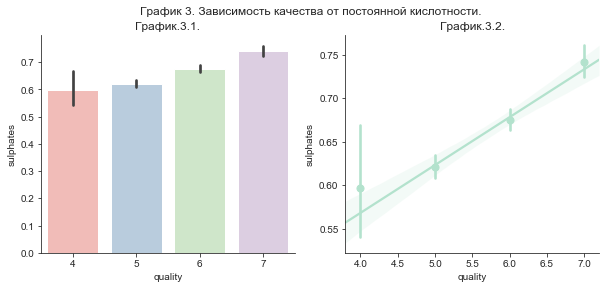

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 4))
sns.despine(right=True)
sns.set_style('white')
sns.set_palette('Pastel1')
g1 = sns.regplot(x="quality", y="sulphates", data=wine, x_estimator=np.mean, ax=ax2)
g2 = sns.barplot(x = 'quality', y = 'sulphates', data = wine, ax=ax1)
ax1.set_title('График.3.1.')
ax2.set_title('График.3.2.')
ax1.tick_params(left=True, bottom=True)
ax2.tick_params(left=True, bottom=True)
fig.suptitle('График 3. Зависимость качества от постоянной кислотности.')
plt.show()

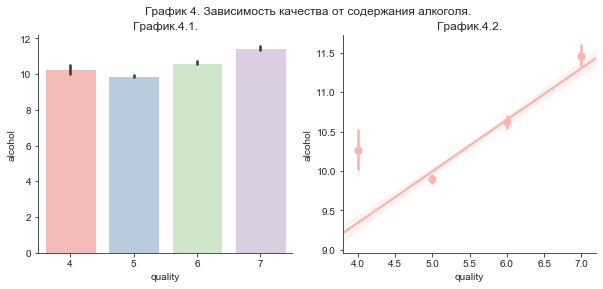

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 4))
sns.despine(right=True)
sns.set_style('white')
sns.set_palette('Pastel1')
g1 = sns.regplot(x="quality", y="alcohol", data=wine, x_estimator=np.mean, ax=ax2)
g2 = sns.barplot(x = 'quality', y = 'alcohol', data = wine, ax=ax1)
ax1.set_title('График.4.1.')
ax2.set_title('График.4.2.')
ax1.tick_params(left=True, bottom=True)
ax2.tick_params(left=True, bottom=True)
fig.suptitle('График 4. Зависимость качества от содержания алкоголя.')
plt.show()

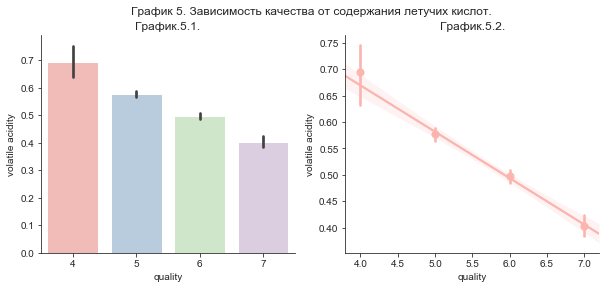

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 4))
sns.despine(right=True)
sns.set_style('white')
sns.set_palette('Pastel1')
g1 = sns.regplot(x="quality", y="volatile acidity", data=wine, x_estimator=np.mean, ax=ax2)
g2 = sns.barplot(x = 'quality', y = 'volatile acidity', data = wine, ax=ax1)
ax1.set_title('График.5.1.')
ax2.set_title('График.5.2.')
ax1.tick_params(left=True, bottom=True)
ax2.tick_params(left=True, bottom=True)
fig.suptitle('График 5. Зависимость качества от содержания летучих кислот.')
plt.show()

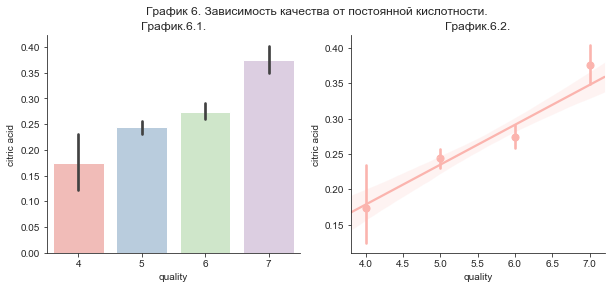

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 4))
sns.despine(right=True)
sns.set_style('white')
sns.set_palette('Pastel1')
g1 = sns.regplot(x="quality", y="citric acid", data=wine, x_estimator=np.mean, ax=ax2)
g2 = sns.barplot(x = 'quality', y = 'citric acid', data = wine, ax=ax1)
ax1.set_title('График.6.1.')
ax2.set_title('График.6.2.')
ax1.tick_params(left=True, bottom=True)
ax2.tick_params(left=True, bottom=True)
fig.suptitle('График 6. Зависимость качества от постоянной кислотности.')
plt.show()

# Сделаем предсказатель качества вина.

In [14]:
from sklearn.preprocessing import StandardScaler

Оставляем для предсказания только самые значимо коррелирующие с качеством признаки.

In [15]:
wine = pd.get_dummies(wine, columns = ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH'])
standardScaler = StandardScaler()
columns_to_scale = ['volatile acidity', 'citric acid', 'alcohol', 'sulphates']
wine[columns_to_scale] = standardScaler.fit_transform(wine[columns_to_scale])

Модель.

In [16]:
y = wine['quality']
X = wine.drop(['quality'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [17]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Используем метод "Random Forest" классификатора.

Text(0.5, 1.0, 'Значение "Random Forest" классификатора для различного числа оценочных функций.')

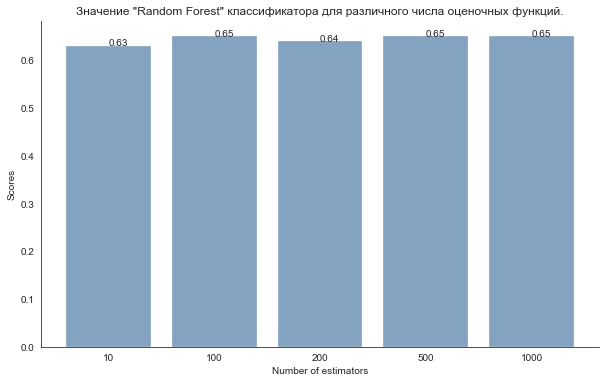

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style('white')
mpl.style.use('seaborn')
sns.despine(right=True)
for i in range(len(rf_scores)):
    rf_scores[i] =round(rf_scores[i], 2)
plt.bar([i for i in range(len(estimators))], rf_scores, width = 0.8, color=(0.2, 0.4, 0.6, 0.6))
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Значение "Random Forest" классификатора для различного числа оценочных функций.')

Как мы можем увидеть из графика, максимальная точность данного классификатора 65%.